In [1]:
import pandas as pd
import numpy as np
import warnings
import sklearn
warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
y10 = pd.read_csv('2009-10.csv')
y11 = pd.read_csv('2010-11.csv')
y12 = pd.read_csv('2011-12.csv')
y13 = pd.read_csv('2012-13.csv')
y14 = pd.read_csv('2013-14.csv')
y15 = pd.read_csv('2014-15.csv')
y16 = pd.read_csv('2015-16.csv')
y17 = pd.read_csv('2016-17.csv')
y18 = pd.read_csv('2017-18.csv')
y19 = pd.read_csv('2018-19.csv')
y20 = pd.read_csv('2019-20.csv')

In [3]:
arr = [y16,y17,y18,y19,y20]
df = []
for i in range(5):
    #df.append(arr[i][['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']])
    df.append(arr[i][['HomeTeam','AwayTeam','FTHG','FTAG','FTR','B365H','B365A','B365D','HS','AS','HST','AST','HY','AY', 'HR','AR']])

In [4]:
dataframe = df[0]
for j in range(1,5):
    dataframe = pd.concat([dataframe,df[j]],ignore_index=True)

In [5]:
df = dataframe
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,HST,AST,HY,AY,HR,AR
0,Bournemouth,Aston Villa,0,1,A,2.00,4.00,3.60,11,7,2,3,3,4,0,0
1,Chelsea,Swansea,2,2,D,1.36,11.00,5.00,11,18,3,10,1,3,1,0
2,Everton,Watford,2,2,D,1.70,5.50,3.90,10,11,5,5,1,2,0,0
3,Leicester,Sunderland,4,2,H,1.95,4.33,3.50,19,10,8,5,2,4,0,0
4,Man United,Tottenham,1,0,H,1.65,6.00,4.00,9,9,1,4,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,1,6,1,2,0,0
1556,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,4,10,2,0,0,0
1557,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,7,2,2,0,0,0
1558,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,1,3,4,3,0,0


In [6]:
df['HP']=np.select([df['FTR']=='H',df['FTR']=='D',df['FTR']=='A'],[3,1,0])
df['AP']=np.select([df['FTR']=='H',df['FTR']=='D',df['FTR']=='A'],[0,1,3])
df['HDG']=df['FTHG']-df['FTAG']
df['ADG']=-df['FTHG']+df['FTAG']
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,HST,AST,HY,AY,HR,AR,HP,AP,HDG,ADG
0,Bournemouth,Aston Villa,0,1,A,2.00,4.00,3.60,11,7,2,3,3,4,0,0,0,3,-1,1
1,Chelsea,Swansea,2,2,D,1.36,11.00,5.00,11,18,3,10,1,3,1,0,1,1,0,0
2,Everton,Watford,2,2,D,1.70,5.50,3.90,10,11,5,5,1,2,0,0,1,1,0,0
3,Leicester,Sunderland,4,2,H,1.95,4.33,3.50,19,10,8,5,2,4,0,0,3,0,2,-2
4,Man United,Tottenham,1,0,H,1.65,6.00,4.00,9,9,1,4,2,3,0,0,3,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,1,6,1,2,0,0,0,3,-1,1
1556,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,4,10,2,0,0,0,0,3,-1,1
1557,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,7,2,2,0,0,0,3,0,4,-4
1558,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,1,3,4,3,0,0,0,3,-2,2


In [7]:
cols=['Team','Points','Goal','Shoot','TargetShoot','DiffG','Yellow','Red']
df1=df[['HomeTeam','AwayTeam','HP','AP','FTHG','FTAG','HS','AS','HST','AST','HDG','ADG','HY','AY', 'HR','AR']]
df1.columns=[np.repeat(cols,2),['Home','Away']*len(cols)]
d1=df1.stack()


In [8]:
d1['GC'] = np.where(d1.DiffG > 0, 0,d1.DiffG)
d1

DiffG  Goal  Points  Red  Shoot  TargetShoot         Team  Yellow  \
0    Away      1     1       3    0      7            3  Aston Villa       4   
     Home     -1     0       0    0     11            2  Bournemouth       3   
1    Away      0     2       1    0     18           10      Swansea       3   
     Home      0     2       1    1     11            3      Chelsea       1   
2    Away      0     2       1    0     11            5      Watford       2   
...          ...   ...     ...  ...    ...          ...          ...     ...   
1557 Home      4     4       3    0     15            7      Arsenal       2   
1558 Away      2     2       3    0      9            3   Man United       3   
     Home     -2     0       0    0     17            1      Chelsea       4   
1559 Away     -2     0       0    0      3            0     West Ham       1   
     Home      2     2       3    0     20            7     Man City       0   

           GC  
0    Away   0  
     Home  -1  
1    Away   0  
     Home   0  
2    Away   0  
...        ..  
1557 Home   0  
1558 Away   0  
     Home  -2  
1559 Away  -2  
     Home   0  

[3120 rows x 9 columns]

In [9]:
mom5 = d1.groupby('Team').apply(lambda x: x.shift().rolling(6, 2).sum())
mom5

DiffG  Goal  Points  Red  Shoot  TargetShoot  Yellow   GC
0    Away    NaN   NaN     NaN  NaN    NaN          NaN     NaN  NaN
     Home    NaN   NaN     NaN  NaN    NaN          NaN     NaN  NaN
1    Away    NaN   NaN     NaN  NaN    NaN          NaN     NaN  NaN
     Home    NaN   NaN     NaN  NaN    NaN          NaN     NaN  NaN
2    Away    NaN   NaN     NaN  NaN    NaN          NaN     NaN  NaN
...          ...   ...     ...  ...    ...          ...     ...  ...
1557 Home    1.0   7.0     7.0  2.0   50.0         18.0    15.0 -1.0
1558 Away    0.0   6.0     7.0  0.0   85.0         31.0     9.0 -6.0
     Home    3.0  10.0     9.0  0.0   92.0         32.0    12.0 -1.0
1559 Away   -2.0   9.0     5.0  0.0   58.0         27.0     6.0 -6.0
     Home    7.0  13.0    13.0  1.0  115.0         39.0     9.0 -2.0

[3120 rows x 8 columns]

In [10]:
mom = d1.groupby('Team').cumsum()
mom
mom1=d1.groupby('Team').apply(lambda x: x.shift().expanding(0).mean()) 
mom1

DiffG      Goal    Points       Red      Shoot  TargetShoot  \
0    Away       NaN       NaN       NaN       NaN        NaN          NaN   
     Home       NaN       NaN       NaN       NaN        NaN          NaN   
1    Away       NaN       NaN       NaN       NaN        NaN          NaN   
     Home       NaN       NaN       NaN       NaN        NaN          NaN   
2    Away       NaN       NaN       NaN       NaN        NaN          NaN   
...             ...       ...       ...       ...        ...          ...   
1557 Home  0.632258  1.825806  1.767742  0.077419  14.329032     5.270968   
1558 Away  0.567742  1.516129  1.787097  0.038710  13.638710     5.012903   
     Home  0.716129  1.819355  1.858065  0.064516  15.419355     5.361290   
1559 Away -0.245161  1.374194  1.251613  0.090323  12.090323     4.109677   
     Home  1.432258  2.367742  2.167742  0.058065  17.451613     6.309677   

             Yellow        GC  
0    Away       NaN       NaN  
     Home       NaN       NaN  
1    Away       NaN       NaN  
     Home       NaN       NaN  
2    Away       NaN       NaN  
...             ...       ...  
1557 Home  1.645161 -0.400000  
1558 Away  1.838710 -0.348387  
     Home  1.548387 -0.393548  
1559 Away  1.832258 -0.819355  
     Home  1.625806 -0.283871  

[3120 rows x 8 columns]

In [11]:
df2=d1.assign(Cum_Points=mom5['Points'],G_scored=mom5['Goal'],G_conceded=mom5['GC'],y_card=mom['Yellow'],r_card=mom['Red'],tot_Points=mom['Points'],tot_G=mom['Goal'],T_conceded=mom['GC'],meanPoints=mom1['Points'],meanScore=mom1['Goal']).unstack()
df2=df2.drop(['Points','Goal','Shoot','TargetShoot','GC','DiffG','Red','Yellow'],axis=1)
df2.head(50)

Team                 Cum_Points      G_scored      G_conceded  \
              Away            Home       Away Home     Away Home       Away   
0      Aston Villa     Bournemouth        NaN  NaN      NaN  NaN        NaN   
1          Swansea         Chelsea        NaN  NaN      NaN  NaN        NaN   
2          Watford         Everton        NaN  NaN      NaN  NaN        NaN   
3       Sunderland       Leicester        NaN  NaN      NaN  NaN        NaN   
4        Tottenham      Man United        NaN  NaN      NaN  NaN        NaN   
5   Crystal Palace         Norwich        NaN  NaN      NaN  NaN        NaN   
6         West Ham         Arsenal        NaN  NaN      NaN  NaN        NaN   
7      Southampton       Newcastle        NaN  NaN      NaN  NaN        NaN   
8        Liverpool           Stoke        NaN  NaN      NaN  NaN        NaN   
9         Man City       West Brom        NaN  NaN      NaN  NaN        NaN   
10      Man United     Aston Villa        NaN  NaN      NaN  NaN        NaN   
11         Everton     Southampton        NaN  NaN      NaN  NaN        NaN   
12         Norwich      Sunderland        NaN  NaN      NaN  NaN        NaN   
13       Newcastle         Swansea        NaN  NaN      NaN  NaN        NaN   
14           Stoke       Tottenham        NaN  NaN      NaN  NaN        NaN   
15       West Brom         Watford        NaN  NaN      NaN  NaN        NaN   
16       Leicester        West Ham        NaN  NaN      NaN  NaN        NaN   
17         Arsenal  Crystal Palace        NaN  NaN      NaN  NaN        NaN   
18         Chelsea        Man City        NaN  NaN      NaN  NaN        NaN   
19     Bournemouth       Liverpool        NaN  NaN      NaN  NaN        NaN   
20     Aston Villa  Crystal Palace        3.0  3.0      1.0  4.0       -1.0   
21       Tottenham       Leicester        1.0  6.0      2.0  6.0       -1.0   
22       Newcastle      Man United        1.0  6.0      2.0  2.0       -2.0   
23           Stoke         Norwich        1.0  3.0      2.0  4.0       -1.0   
24         Swansea      Sunderland        4.0  0.0      4.0  3.0        0.0   
25     Bournemouth        West Ham        0.0  3.0      0.0  3.0       -2.0   
26        Man City         Everton        6.0  4.0      6.0  5.0        0.0   
27     Southampton         Watford        1.0  2.0      2.0  2.0       -3.0   
28         Chelsea       West Brom        1.0  1.0      2.0  0.0       -3.0   
29       Liverpool         Arsenal        6.0  3.0      2.0  2.0        0.0   
30      Sunderland     Aston Villa        1.0  3.0      4.0  2.0       -4.0   
31       Leicester     Bournemouth        7.0  3.0      7.0  4.0        0.0   
32  Crystal Palace         Chelsea        6.0  4.0      6.0  5.0       -1.0   
33        West Ham       Liverpool        3.0  7.0      6.0  2.0       -2.0   
34         Watford        Man City        3.0  9.0      2.0  8.0        0.0   
35         Arsenal       Newcastle        4.0  2.0      2.0  2.0       -2.0   
36       West Brom           Stoke        1.0  2.0      2.0  3.0       -4.0   
37         Everton       Tottenham        4.0  2.0      5.0  3.0       -2.0   
38         Norwich     Southampton        4.0  2.0      5.0  2.0       -2.0   
39      Man United         Swansea        7.0  5.0      2.0  5.0        0.0   
40           Stoke         Arsenal        2.0  7.0      3.0  3.0       -2.0   
41        Man City  Crystal Palace       12.0  9.0     10.0  8.0        0.0   
42         Chelsea         Everton        4.0  5.0      6.0  5.0       -4.0   
43       Liverpool      Man United        7.0  7.0      2.0  3.0       -3.0   
44     Bournemouth         Norwich        4.0  4.0      5.0  5.0       -2.0   
45         Swansea         Watford        8.0  3.0      7.0  2.0        0.0   
46     Southampton       West Brom        5.0  4.0      5.0  3.0       -3.0   
47     Aston Villa       Leicester        4.0  8.0      4.0  8.0       -2.0   
48       Tottenham      Sunderland        3.0  2.0      3.0  6.0

In [12]:
df2.columns = df2.columns.droplevel(0)

In [13]:
col_names = ['AwayTeam','HomeTeam','PCA','PCH','GSA','GSH','GCA','GCH','yA','yH','RA','RH','TPA','TPH','TGA','TGH','TCA','TCH','MpA','MpH','MgA','MgH']
# pd.DataFrame(df2, columns = col_names)

In [14]:
col_list1 = list(df2)
# col_list
# # use this handy way to swap the elements
col_list1 = col_names
# # assign back, the order will now be swapped
df2.columns = col_names
df2

,AwayTeam,HomeTeam,PCA,PCH,GSA,GSH,GCA,GCH,yA,yH,...,TPA,TPH,TGA,TGH,TCA,TCH,MpA,MpH,MgA,MgH
0,Aston Villa,Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,4,3,...,3,0,1,0,0,-1,NaN,NaN,NaN,NaN
1,Swansea,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,3,1,...,1,1,2,2,0,0,NaN,NaN,NaN,NaN
2,Watford,Everton,NaN,NaN,NaN,NaN,NaN,NaN,2,1,...,1,1,2,2,0,0,NaN,NaN,NaN,NaN
3,Sunderland,Leicester,NaN,NaN,NaN,NaN,NaN,NaN,4,2,...,0,3,2,4,-2,0,NaN,NaN,NaN,NaN
4,Tottenham,Man United,NaN,NaN,NaN,NaN,NaN,NaN,3,2,...,0,3,0,1,-1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Liverpool,Norwich,18.0,6.0,13.0,5.0,0.0,-5.0,201,109,...,329,52,320,63,-39,-71,2.103226,0.825397,2.058065,1.000000
1556,Tottenham,Aston Villa,8.0,7.0,6.0,7.0,-2.0,-9.0,258,123,...,309,42,302,61,-41,-81,1.974194,0.666667,1.929032,0.936508
1557,Newcastle,Arsenal,6.0,7.0,5.0,7.0,-4.0,-1.0,174,257,...,125,277,120,287,-102,-62,1.068376,1.767742,1.025641,1.825806
1558,Man United,Chelsea,7.0,9.0,6.0,10.0,-6.0,-1.0,288,244,...,280,288,237,282,-54,-63,1.787097,1.858065,1.516129,1.819355


In [15]:
columnsTitles= ['HomeTeam','AwayTeam','PCA','PCH','GSA','GSH','GCA','GCH','yA','yH','RA','RH','TPA','TPH','TGA','TGH','TCA','TCH', 'MpA','MpH','MgA','MgH']
df2=df2.reindex(columns=columnsTitles)

In [16]:
df_final = pd.concat([dataframe, df2],axis=1)
df_final

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,TPA,TPH,TGA,TGH,TCA,TCH,MpA,MpH,MgA,MgH
0,Bournemouth,Aston Villa,0,1,A,2.00,4.00,3.60,11,7,...,3,0,1,0,0,-1,NaN,NaN,NaN,NaN
1,Chelsea,Swansea,2,2,D,1.36,11.00,5.00,11,18,...,1,1,2,2,0,0,NaN,NaN,NaN,NaN
2,Everton,Watford,2,2,D,1.70,5.50,3.90,10,11,...,1,1,2,2,0,0,NaN,NaN,NaN,NaN
3,Leicester,Sunderland,4,2,H,1.95,4.33,3.50,19,10,...,0,3,2,4,-2,0,NaN,NaN,NaN,NaN
4,Man United,Tottenham,1,0,H,1.65,6.00,4.00,9,9,...,0,3,0,1,-1,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,...,329,52,320,63,-39,-71,2.103226,0.825397,2.058065,1.000000
1556,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,...,309,42,302,61,-41,-81,1.974194,0.666667,1.929032,0.936508
1557,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,...,125,277,120,287,-102,-62,1.068376,1.767742,1.025641,1.825806
1558,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,...,280,288,237,282,-54,-63,1.787097,1.858065,1.516129,1.819355


In [17]:
df_final=df_final.dropna(axis=0)
def diffpoints(p):
    p['HTGD'] = p['TGA'] - p['TGH']
    p['HTGDF'] = p['GSA'] - p['GSH']
    p['HTGCF'] = p['GCA'] - p['GCH']
    p['DiffPts'] = p['TPA'] - p['TPH']
    p['diffform'] = p['PCA'] - p['PCH']
    return p

diffpoints(df_final)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,TCH,MpA,MpH,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform
20,Crystal Palace,Aston Villa,2,1,H,1.85,4.75,3.60,16,11,...,-1,1.500000,1.500000,0.500000,2.000000,-4,-3.0,0.0,-3,0.0
21,Leicester,Tottenham,1,1,D,2.63,2.75,3.60,13,19,...,0,0.500000,3.000000,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0
22,Man United,Newcastle,0,0,D,1.36,10.00,5.25,20,7,...,0,0.500000,3.000000,1.000000,1.000000,0,0.0,-2.0,-5,-5.0
23,Norwich,Stoke,1,1,D,2.30,3.50,3.30,21,6,...,-2,0.500000,1.500000,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0
24,Sunderland,Swansea,1,1,D,4.00,2.10,3.40,10,20,...,-4,2.000000,0.000000,2.000000,1.500000,1,1.0,4.0,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,...,-71,2.103226,0.825397,2.058065,1.000000,257,8.0,5.0,277,12.0
1556,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,...,-81,1.974194,0.666667,1.929032,0.936508,241,-1.0,7.0,267,1.0
1557,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,...,-62,1.068376,1.767742,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0
1558,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,...,-63,1.787097,1.858065,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df_final
Y_Bet=df_final[['B365H','B365D','B365A']].apply(lambda x:1/x)
Y_Bet_FTR=np.select([Y_Bet.idxmax(axis=1)=='B365H',Y_Bet.idxmax(axis=1)=='B365D',Y_Bet.idxmax(axis=1)=='B365A'],['H','D','A'])
df_final['Y_Bet_FTR']= Y_Bet_FTR


In [20]:
# X_all
df_final = df_final.reset_index(drop=True)
df_final

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,MpA,MpH,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform,Y_Bet_FTR
0,Crystal Palace,Aston Villa,2,1,H,1.85,4.75,3.60,16,11,...,1.500000,1.500000,0.500000,2.000000,-4,-3.0,0.0,-3,0.0,H
1,Leicester,Tottenham,1,1,D,2.63,2.75,3.60,13,19,...,0.500000,3.000000,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0,H
2,Man United,Newcastle,0,0,D,1.36,10.00,5.25,20,7,...,0.500000,3.000000,1.000000,1.000000,0,0.0,-2.0,-5,-5.0,H
3,Norwich,Stoke,1,1,D,2.30,3.50,3.30,21,6,...,0.500000,1.500000,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0,H
4,Sunderland,Swansea,1,1,D,4.00,2.10,3.40,10,20,...,2.000000,0.000000,2.000000,1.500000,1,1.0,4.0,4,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,...,2.103226,0.825397,2.058065,1.000000,257,8.0,5.0,277,12.0,A
1518,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,...,1.974194,0.666667,1.929032,0.936508,241,-1.0,7.0,267,1.0,A
1519,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,...,1.068376,1.767742,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0,H
1520,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,...,1.787097,1.858065,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0,H


In [21]:
df_final.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'B365H', 'B365A',
       'B365D', 'HS', 'AS', 'HST', 'AST', 'HY', 'AY', 'HR', 'AR', 'HP', 'AP',
       'HDG', 'ADG', 'HomeTeam', 'AwayTeam', 'PCA', 'PCH', 'GSA', 'GSH', 'GCA',
       'GCH', 'yA', 'yH', 'RA', 'RH', 'TPA', 'TPH', 'TGA', 'TGH', 'TCA', 'TCH',
       'MpA', 'MpH', 'MgA', 'MgH', 'HTGD', 'HTGDF', 'HTGCF', 'DiffPts',
       'diffform', 'Y_Bet_FTR'],
      dtype='object')

In [22]:
a = np.arange(0,1522,1)
h_s = []
a_s = []


for i in a:
    print(i)
    h= df_final.iloc[i][0]      
    a = df_final.iloc[i][1] 
    index = []
    h_scores = 0
    a_scores = 0
    for i in range(0,i):
        if (h == df_final.iloc[i][0] or h == df_final.iloc[i][1]) and (a == df_final.iloc[i][0] or a == df_final.iloc[i][1]):
            index.append(i)
            #print(i,df_final.iloc[i][0],df_final.iloc[i][1])
            for j in index:
                #print(df_final.iloc[j])
                if h == df_final.iloc[j][0] and a == df_final.iloc[j][1]:
                    h_scores += df_final.iloc[j][16]
                    a_scores += df_final.iloc[j][17]
                else:
                    a_scores += df_final.iloc[j][16]
                    h_scores += df_final.iloc[j][17]

            #print('h:',h_scores,'a:',a_scores)

    h_s.append(h_scores) 
    a_s.append(a_scores)
                
                
    
print(a_s,h_s)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
df_final['FMPH'] = h_s
df_final['FMPA'] = a_s

In [24]:
df_final

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform,Y_Bet_FTR,FMPH,FMPA
0,Crystal Palace,Aston Villa,2,1,H,1.85,4.75,3.60,16,11,...,0.500000,2.000000,-4,-3.0,0.0,-3,0.0,H,0,0
1,Leicester,Tottenham,1,1,D,2.63,2.75,3.60,13,19,...,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0,H,0,0
2,Man United,Newcastle,0,0,D,1.36,10.00,5.25,20,7,...,1.000000,1.000000,0,0.0,-2.0,-5,-5.0,H,0,0
3,Norwich,Stoke,1,1,D,2.30,3.50,3.30,21,6,...,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0,H,0,0
4,Sunderland,Swansea,1,1,D,4.00,2.10,3.40,10,20,...,2.000000,1.500000,1,1.0,4.0,4,4.0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,...,2.058065,1.000000,257,8.0,5.0,277,12.0,A,3,12
1518,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,...,1.929032,0.936508,241,-1.0,7.0,267,1.0,A,0,18
1519,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,...,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0,H,54,9
1520,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,...,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0,H,47,44


In [25]:
y_all = df_final[['FTR']]
X_all = df_final.drop(['HomeTeam','AwayTeam','FTR','HDG','ADG','FTHG','FTAG','HP','AP','GCA','GCH','AST','HY','AY','HR','AR','B365H','B365A','B365D','PCA','PCH','GSA','GSH','GCA','RA','RH','GCH','TPA','TPH','TGA','TGH','TCA','TCH','HS','AS','HST'],axis=1)

from sklearn.preprocessing import LabelEncoder
X_all['Y_Bet_FTR'] = LabelEncoder().fit_transform(X_all['Y_Bet_FTR'])
X_all 

,yA,yH,MpA,MpH,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform,Y_Bet_FTR,FMPH,FMPA
0,9,4,1.500000,1.500000,0.500000,2.000000,-4,-3.0,0.0,-3,0.0,1,0,0
1,9,6,0.500000,3.000000,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0,1,0,0
2,5,6,0.500000,3.000000,1.000000,1.000000,0,0.0,-2.0,-5,-5.0,1,0,0
3,5,7,0.500000,1.500000,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0,1,0,0
4,7,9,2.000000,0.000000,2.000000,1.500000,1,1.0,4.0,4,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,201,109,2.103226,0.825397,2.058065,1.000000,257,8.0,5.0,277,12.0,0,3,12
1518,258,123,1.974194,0.666667,1.929032,0.936508,241,-1.0,7.0,267,1.0,0,0,18
1519,174,257,1.068376,1.767742,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0,1,54,9
1520,288,244,1.787097,1.858065,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0,1,47,44


In [26]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_all = min_max_scaler.fit_transform(X_all)


# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.052,
                                                    random_state = 45,
                                                    stratify = y_all)


In [27]:
from sklearn.svm import SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 1)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, Y_pred)
print(sklearn.metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.53      0.75      0.62        24
           D       0.00      0.00      0.00        20
           H       0.67      0.86      0.76        36

    accuracy                           0.61        80
   macro avg       0.40      0.54      0.46        80
weighted avg       0.46      0.61      0.53        80



In [28]:
from sklearn.neighbors import KNeighborsClassifier
clfknn = KNeighborsClassifier(n_neighbors = 25)
clfknn.fit(X_train, y_train)
y_pred = clfknn.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.59      0.79      0.68        24
           D       1.00      0.10      0.18        20
           H       0.70      0.89      0.78        36

    accuracy                           0.66        80
   macro avg       0.76      0.59      0.55        80
weighted avg       0.74      0.66      0.60        80



In [29]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred_log=clf.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           A       0.60      0.75      0.67        24
           D       0.00      0.00      0.00        20
           H       0.65      0.89      0.75        36

    accuracy                           0.62        80
   macro avg       0.42      0.55      0.47        80
weighted avg       0.47      0.62      0.54        80



In [30]:
clf_nb = OneVsRestClassifier(MultinomialNB())
model_nb = clf_nb.fit(X_train, y_train)
y_pred_nb_ib = model_nb.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred_nb_ib)
print(sklearn.metrics.classification_report(y_test, y_pred_nb_ib))

              precision    recall  f1-score   support

           A       0.55      0.71      0.62        24
           D       0.00      0.00      0.00        20
           H       0.65      0.89      0.75        36

    accuracy                           0.61        80
   macro avg       0.40      0.53      0.46        80
weighted avg       0.46      0.61      0.52        80



In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(7,1),random_state=1)
model_nn = clf.fit(X_train, y_train)
y_pred_nn=model_nn.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           A       0.61      0.79      0.69        24
           D       0.00      0.00      0.00        20
           H       0.63      0.86      0.73        36

    accuracy                           0.62        80
   macro avg       0.42      0.55      0.47        80
weighted avg       0.47      0.62      0.54        80



In [32]:
df_final = df_final.loc[:,~df_final.columns.duplicated()]

In [33]:
df_final

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform,Y_Bet_FTR,FMPH,FMPA
0,Crystal Palace,Aston Villa,2,1,H,1.85,4.75,3.60,16,11,...,0.500000,2.000000,-4,-3.0,0.0,-3,0.0,H,0,0
1,Leicester,Tottenham,1,1,D,2.63,2.75,3.60,13,19,...,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0,H,0,0
2,Man United,Newcastle,0,0,D,1.36,10.00,5.25,20,7,...,1.000000,1.000000,0,0.0,-2.0,-5,-5.0,H,0,0
3,Norwich,Stoke,1,1,D,2.30,3.50,3.30,21,6,...,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0,H,0,0
4,Sunderland,Swansea,1,1,D,4.00,2.10,3.40,10,20,...,2.000000,1.500000,1,1.0,4.0,4,4.0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Norwich,Liverpool,0,1,A,11.00,1.25,6.25,5,17,...,2.058065,1.000000,257,8.0,5.0,277,12.0,A,3,12
1518,Aston Villa,Tottenham,2,3,A,4.00,1.85,3.80,18,23,...,1.929032,0.936508,241,-1.0,7.0,267,1.0,A,0,18
1519,Arsenal,Newcastle,4,0,H,1.40,8.00,4.75,15,10,...,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0,H,54,9
1520,Chelsea,Man United,0,2,A,1.85,4.50,3.50,17,9,...,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0,H,47,44


In [34]:
df_final.groupby(['HomeTeam'])

In [35]:
print(sklearn.metrics.classification_report(y_test, Y_pred))
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.classification_report(y_test, y_pred_log))
print(sklearn.metrics.classification_report(y_test, y_pred_nb_ib))
print(sklearn.metrics.classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           A       0.53      0.75      0.62        24
           D       0.00      0.00      0.00        20
           H       0.67      0.86      0.76        36

    accuracy                           0.61        80
   macro avg       0.40      0.54      0.46        80
weighted avg       0.46      0.61      0.53        80

              precision    recall  f1-score   support

           A       0.59      0.79      0.68        24
           D       1.00      0.10      0.18        20
           H       0.70      0.89      0.78        36

    accuracy                           0.66        80
   macro avg       0.76      0.59      0.55        80
weighted avg       0.74      0.66      0.60        80

              precision    recall  f1-score   support

           A       0.60      0.75      0.67        24
           D       0.00      0.00      0.00        20
           H       0.65      0.89      0.75        36

    accuracy        

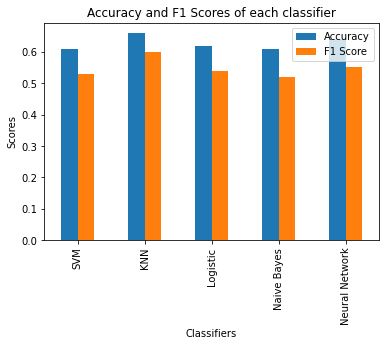

In [36]:
Accuracy = [0.61, 0.66, 0.62, 0.61, 0.64]
F1_Score = [0.53,0.60,0.54,0.52,0.55]
index = ['SVM', 'KNN', 'Logistic','Naive Bayes', 'Neural Network']
df = pd.DataFrame({'Accuracy': Accuracy,'F1 Score': F1_Score}, index=index)
ax = df.plot.bar(rot=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.title("Accuracy and F1 Scores of each classifier")
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder
df_final['FTR'] = LabelEncoder().fit_transform(df_final['FTR'])

<function matplotlib.pyplot.show(close=None, block=None)>

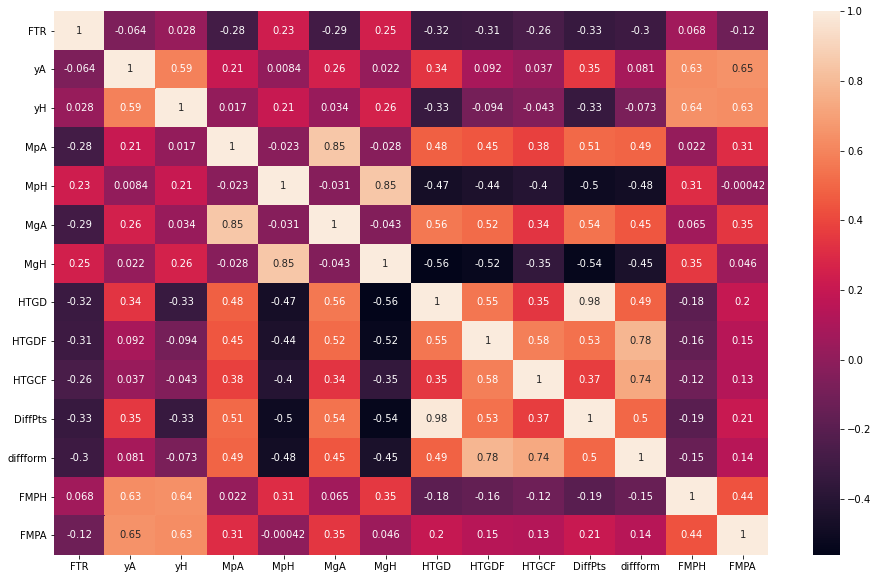

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
X_all1 = df_final.drop(['HomeTeam','AwayTeam','HDG','ADG','FTHG','FTAG','HP','AP','GCA','GCH','AST','HY','AY','HR','AR','B365H','B365A','B365D','PCA','PCH','GSA','GSH','GCA','RA','RH','GCH','TPA','TPH','TGA','TGH','TCA','TCH','HS','AS','HST'],axis=1)
plt.figure(figsize = (16,10))
sns.heatmap(X_all1.corr(),annot=True)
plt.show

In [39]:
df_final

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365A,B365D,HS,AS,...,MgA,MgH,HTGD,HTGDF,HTGCF,DiffPts,diffform,Y_Bet_FTR,FMPH,FMPA
0,Crystal Palace,Aston Villa,2,1,2,1.85,4.75,3.60,16,11,...,0.500000,2.000000,-4,-3.0,0.0,-3,0.0,H,0,0
1,Leicester,Tottenham,1,1,1,2.63,2.75,3.60,13,19,...,1.000000,3.000000,-4,-4.0,-1.0,-5,-5.0,H,0,0
2,Man United,Newcastle,0,0,1,1.36,10.00,5.25,20,7,...,1.000000,1.000000,0,0.0,-2.0,-5,-5.0,H,0,0
3,Norwich,Stoke,1,1,1,2.30,3.50,3.30,21,6,...,1.000000,2.000000,-2,-2.0,1.0,-2,-2.0,H,0,0
4,Sunderland,Swansea,1,1,1,4.00,2.10,3.40,10,20,...,2.000000,1.500000,1,1.0,4.0,4,4.0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Norwich,Liverpool,0,1,0,11.00,1.25,6.25,5,17,...,2.058065,1.000000,257,8.0,5.0,277,12.0,A,3,12
1518,Aston Villa,Tottenham,2,3,0,4.00,1.85,3.80,18,23,...,1.929032,0.936508,241,-1.0,7.0,267,1.0,A,0,18
1519,Arsenal,Newcastle,4,0,2,1.40,8.00,4.75,15,10,...,1.025641,1.825806,-167,-2.0,-3.0,-152,-1.0,H,54,9
1520,Chelsea,Man United,0,2,0,1.85,4.50,3.50,17,9,...,1.516129,1.819355,-45,-4.0,-5.0,-8,-2.0,H,47,44


<AxesSubplot:title={'center':'Mean Points for Home Teams'}, xlabel='HomeTeam'>

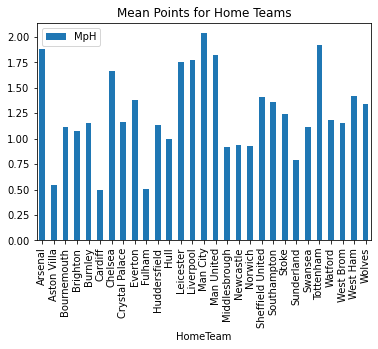

In [40]:
df_final.groupby(['HomeTeam']).mean()[['MpH']].plot(kind='bar',title = 'Mean Points for Home Teams')

<AxesSubplot:title={'center':'Mean Points for Away Teams'}, xlabel='AwayTeam'>

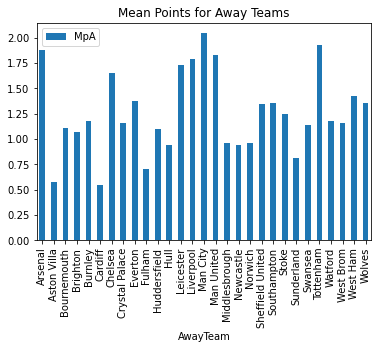

In [41]:
df_final.groupby(['AwayTeam']).mean()[['MpA']].plot(kind='bar',title = 'Mean Points for Away Teams')

In [42]:
df_final.groupby(['HomeTeam','AwayTeam']).max()

FTHG  FTAG  FTR  B365H  B365A  B365D  HS  AS  HST  \
HomeTeam AwayTeam                                                              
Arsenal  Aston Villa          4     2    2   1.40  17.00   9.00  21  14    7   
         Bournemouth          3     1    2   1.44   9.00   5.50  16  10    8   
         Brighton             2     2    2   1.57  13.00   6.50  25  20   12   
         Burnley              5     1    2   1.57  17.00   7.50  24  18    9   
         Chelsea              3     2    2   2.87   3.90   3.75  14  19    6   
...                         ...   ...  ...    ...    ...    ...  ..  ..  ...   
Wolves   Sheffield United     1     1    1   1.90   4.20   3.50  13   9    3   
         Southampton          2     1    2   1.80   5.25   3.60  14  17    6   
         Tottenham            2     3    0   3.25   2.45   3.40  18  10    7   
         Watford              2     2    2   1.85   5.25   3.75  10  14    2   
         West Ham             2     0    2   1.75   4.75   3.70  13   6    7   

                           AST  ...       MgA       MgH  HTGD  HTGDF  HTGCF  \
HomeTeam AwayTeam               ...                                           
Arsenal  Aston Villa         9  ...  0.729730  1.918519   -38   -4.0   -6.0   
         Bournemouth         3  ...  1.335766  1.919708   -11    1.0    5.0   
         Brighton            9  ...  1.014706  1.881944  -148    1.0    0.0   
         Burnley             7  ...  1.095238  1.923664   -91   -4.0    1.0   
         Chelsea             6  ...  1.886598  1.855670     3    5.0    4.0   
...                        ...  ...       ...       ...   ...    ...    ...   
Wolves   Sheffield United    4  ...  1.230769  1.206897   -19    0.0    0.0   
         Southampton         6  ...  1.191667  1.166667   135    0.0   -2.0   
         Tottenham           8  ...  1.979452  1.250000   250    4.0    1.0   
         Watford             5  ...  1.106557  1.125000   128   -1.0   -7.0   
         West Ham            3  ...  1.388889  1.200000   162   -2.0   -7.0   

                           DiffPts  diffform  Y_Bet_FTR  FMPH  FMPA  
HomeTeam AwayTeam                                                    
Arsenal  Aston Villa           -54      -7.0          H     9     0  
         Bournemouth           -19       2.0          H    70    10  
         Brighton             -152       2.0          H     6     3  
         Burnley               -92      -1.0          H    30     0  
         Chelsea                15       3.0          H    20    59  
...                            ...       ...        ...   ...   ...  
Wolves   Sheffield United      -23      -2.0          H     0     0  
         Southampton           138      -1.0          H     3     0  
         Tottenham             249       2.0          A     0     3  
         Watford               127      -2.0          H     0     3  
         West Ham              141      -6.0          H     3     0  

[638 rows x 46 columns]

In [43]:
df_final['FTR'].value_counts()

2    688
0    453
1    381
Name: FTR, dtype: int64

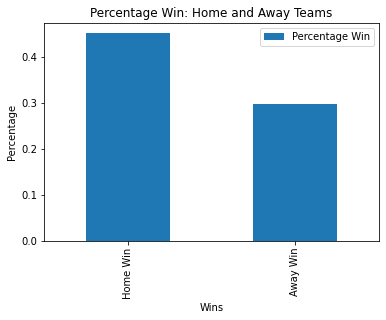

In [44]:
pw = [688/(688+453+381),453/(688+453+381)]
# F1_Score = [0.53,0.60,0.54,0.52,0.55]
index = ['Home Win', 'Away Win']
df11 = pd.DataFrame({'Percentage Win': pw}, index=index)
ax = df11.plot.bar(rot=90)
plt.xlabel("Wins")
plt.ylabel("Percentage")
plt.title("Percentage Win: Home and Away Teams")
plt.show()

